# Relatório de Análise VIII

Um boxplot representa a distribuição dos dados   

<p align="center">
<img src="compressed_box-plot.png" width="50%" height="50%">
<img align="center" src="./Different-types-of-distributions-symmetric-and-asymmetric-and-the-corresponding_Q320.jpg" width="50%" height="50%">
</p>

moda é a maior das colunas do histograma  
mediana é apresentada no boxplot, póximo da moda   
média é no meio do gráfico de histograma  

A mediana é sempre na coluna mais alta, então, na direção da maior curva do grafico vem a mediana e a média

A distribuição é normalmente (exceto em finanças) simétrica, sendo esse um padrão da natureza 

<p align="center">
<img  src="skewness.png" width="50%" height="50%" >
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('./data/aluguel_residencial.csv', sep=';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


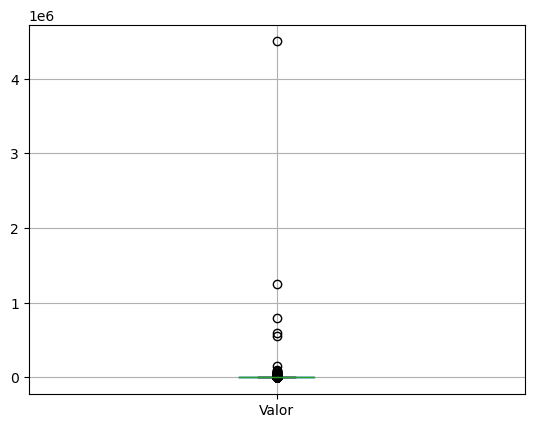

In [4]:
# Usamos para encontrar os outliers
dados.boxplot(['Valor'])
plt.show()

In [5]:
dados[dados['Valor'] >= 2*(10**6)] # é igual a 2 1e6

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.0,Apartamento


In [6]:
dados[dados['Valor'] >= 5*(10**5)] # é igual a metade de 1 1e6

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [7]:
valor = dados['Valor']

In [8]:
# Calculamos os limites do boxplot para podermos selecionar apenas valores dentro deles
# Assim removendo os boxplots
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

print(Q1)
print(Q3)
print()
print(IIQ)
print()
print(limite_inferior)
print(limite_superior)

1600.0
5500.0

3900.0

-4250.0
11350.0


In [9]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [10]:
dados_new = dados[selecao]

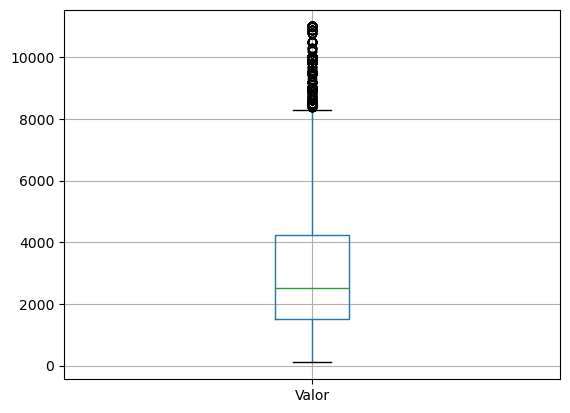

In [11]:
# Novos valores aparecem fora dos limites já que o dataset foi alterado
dados_new.boxplot(['Valor'])
plt.show()

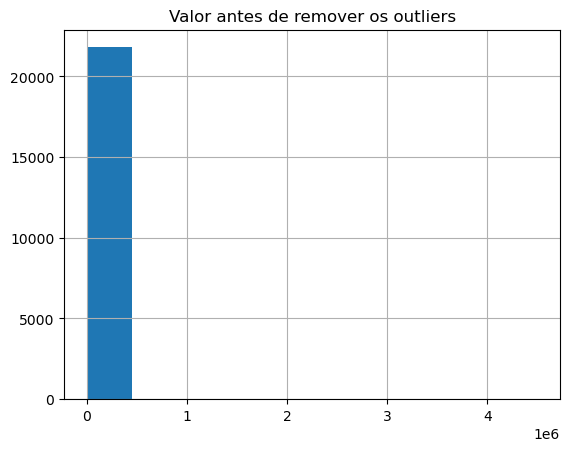

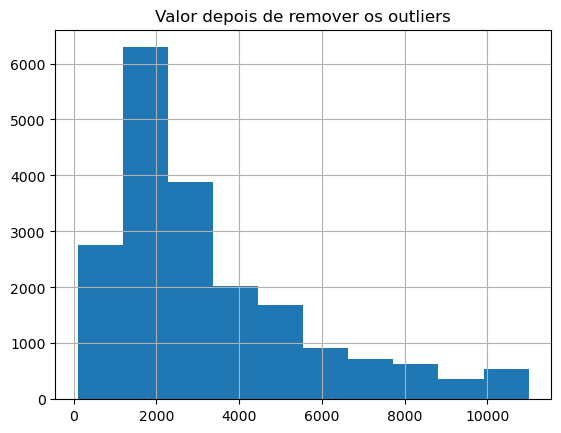

In [15]:
# Depois da remoçao dos outliers é possivel ver uma distribuição mais simétrica!
dados.hist(['Valor'])
plt.title('Valor antes de remover os outliers')
plt.show()
dados_new.hist(['Valor'])
plt.title('Valor depois de remover os outliers')
plt.show()

## Identificando e Removendo Outliers (Continuação)
Nós já removemos os outliers de valor do dataframe como um todo, ou seja não levamos nenhuma forma de agrupamento em consideração na hora de remover os outliers
Mas agora iremos fazer o processo de remover os valores outliers, mas vamos considerar o Tipo como forma de agrupamento

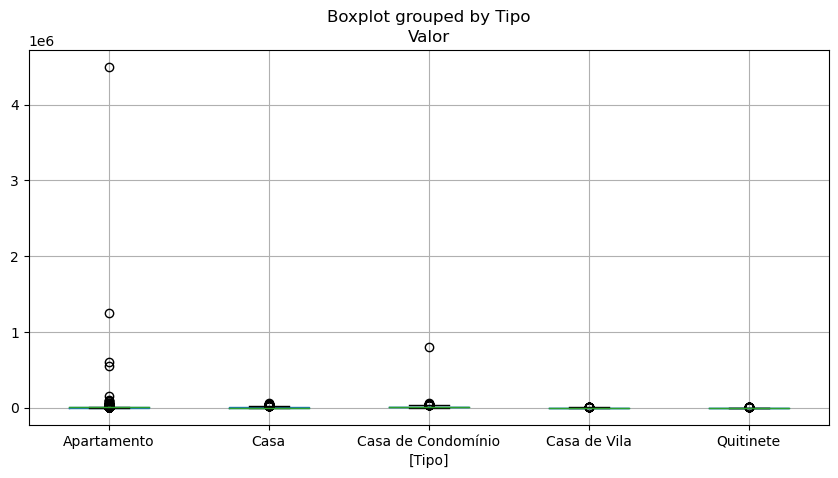

In [40]:
dados.boxplot(['Valor'], by=['Tipo'], figsize=(10, 5))
plt.show()

In [58]:
# Agrupamos todas as informações por tipo
grupo_tipo = dados.groupby('Tipo')
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [59]:
# Retiramos todos os outros dados dos grupos, deixando apenas Valor
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [63]:
# Calculamos os limites da boxplot de todos os grupos
Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(0.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

print(Q1)


Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64


In [64]:
print(Q3)

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64


In [65]:
print(IIQ)

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64


In [66]:
print(limite_inferior)

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64


In [67]:
print(limite_superior)

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64


In [69]:
print(limite_superior['Apartamento'])
print(limite_superior['Casa'])

9950.0
22850.0


<p align="center">
<img src="compressed_box-plot.png" width="50%" height="50%" >
<img src="./Different-types-of-distributions-symmetric-and-asymmetric-and-the-corresponding_Q320.jpg" width="50%" height="50%" >
</p>

In [83]:
# Vamos remover os outliers de todos os grupos e adiconar eles neste dataframe
dados_new = pd.DataFrame()

# Passamos por cada grupo (Apartamento, Casa, Casa de Condomínio, Casa de Vila, Quitinete)
for tipo in grupo_tipo.groups.keys():
    
    # Selecionamos os dados que são desse tipo do dataframe original (com todos os dados)
    eh_tipo = dados['Tipo'] == tipo

    # Selecionamos os dados que estão dentro dos limites desse tipo 
    # limite_inferior[tipo] <= dados['Valor'] <= limite_superior[tipo]
    eh_dentro_limite = (limite_inferior[tipo] <= dados['Valor'] ) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    
    dados_selecao = dados[selecao]
    
    # Adicinamos os dados sem os outliers no novo dataframe
    dados_new = pd.concat([dados_new, dados_selecao])

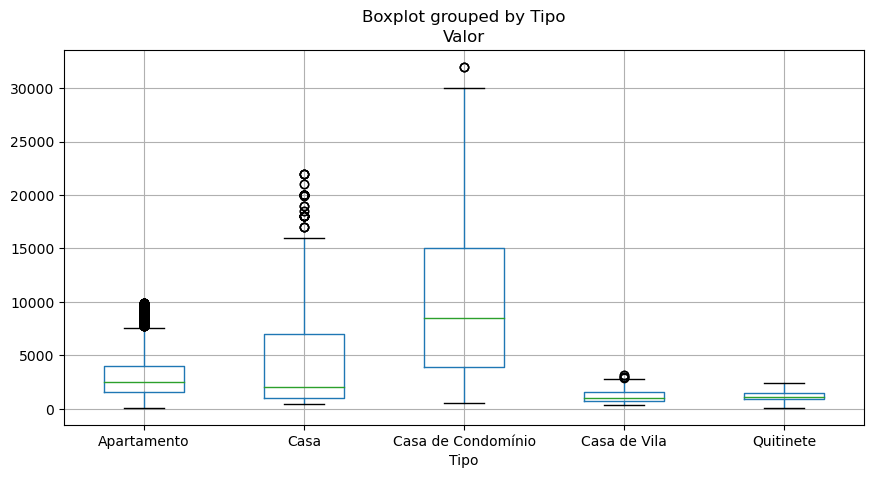

In [90]:
dados_new.boxplot(['Valor'], by='Tipo',figsize=(10,5))
plt.show()

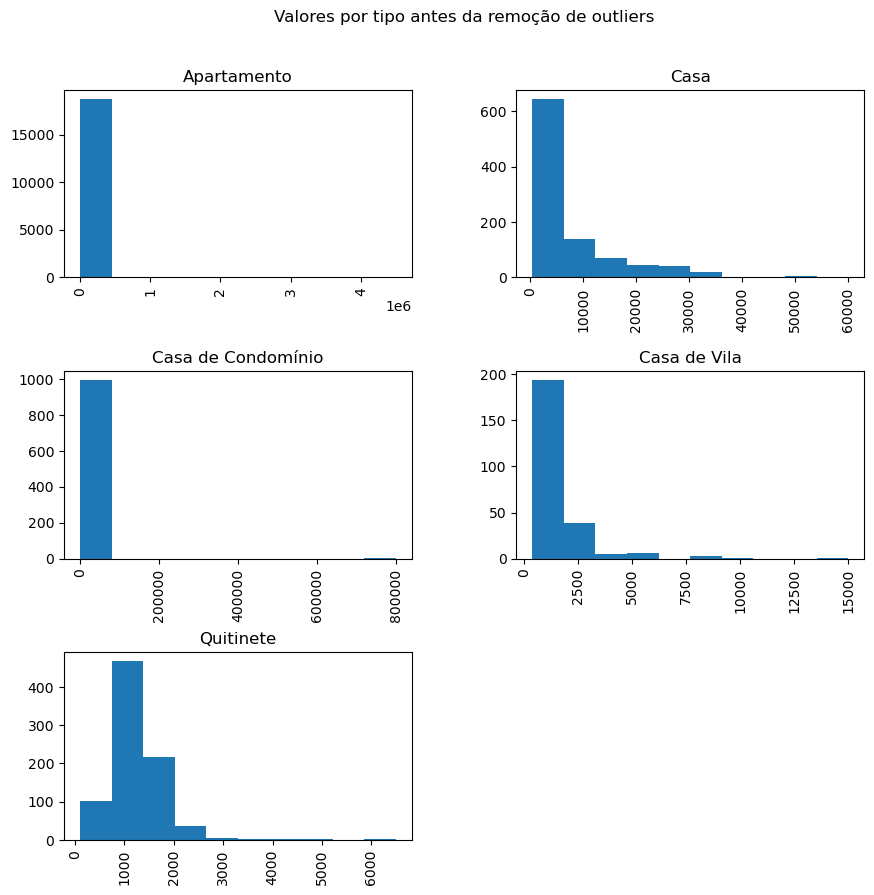

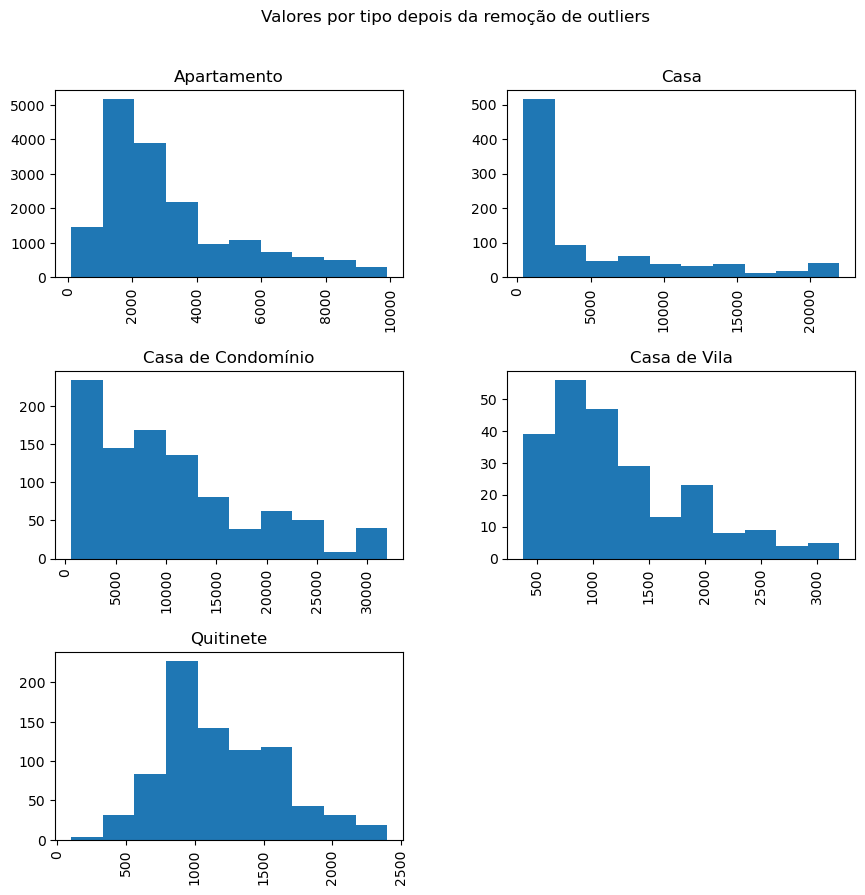

In [107]:
import pylab as pl

dados.hist(['Valor'], by='Tipo',figsize=(10,10))
pl.suptitle("Valores por tipo antes da remoção de outliers")

dados_new.hist(['Valor'], by='Tipo',figsize=(10,10))
pl.suptitle("Valores por tipo depois da remoção de outliers")
plt.show()

In [108]:
dados_new.to_csv('./data/aluguel_residencial_sem_outliers.csv', sep=';', index=False)